In [1]:
import torch
from micrograd.engine import Value

from graphviz import Digraph

In [2]:
def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, name="graph", format='png', rankdir='LR'):

    assert format  in ['png', 'svg']
    assert rankdir in ['LR', 'TB', "BT", "RL"]

    nodes, edges = trace(root)
    dot = Digraph(name,
                  filename=name,
                  format=format,
                  graph_attr={'rankdir': rankdir},
                  node_attr={'style': "filled"})
    
    for n in nodes:
        dot.node(name=str(id(n)), label="<d> data %.1f | <g> grad %.1f" % (n.data, n.grad), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op, fillcolor='orange')
            dot.edge(str(id(n)) + n._op, str(id(n))+ ":d")
    
    for n1, n2 in edges:
        dot.edge(str(id(n1))+":d", str(id(n2)) + n2._op)
    
    return dot

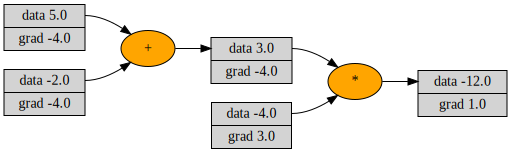

In [3]:
x = Value(-2.0)
y = Value(5.0)
z = Value(-4.0)
o = ((x + y)*z)
o.backward()
graph = draw_dot(o, name="graph")
graph.render()
graph

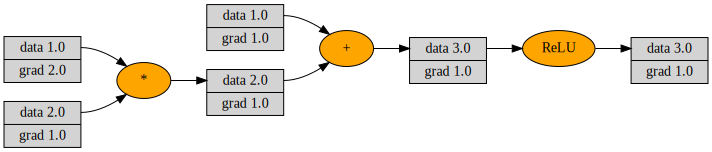

In [4]:
# a very simple example
x = Value(1.0)
y = (x * 2 + 1).relu()
y.backward()
graph2 = draw_dot(y, name="graph2")
graph2.render()
graph2

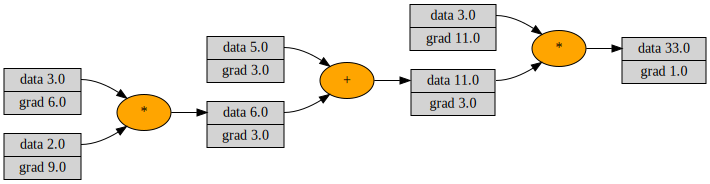

In [5]:
# a very simple example
a = Value(5)
b = Value(3)
c = Value(2)
y = 3*(a + (b * c))
y.backward()
draw_dot(y)

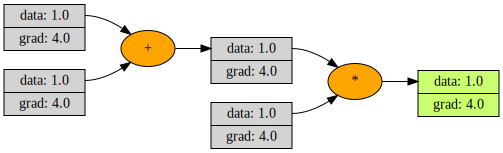

In [6]:
s = Digraph(filename='grafo',
            format="png",
            graph_attr={'rankdir': "LR"},
            node_attr={'style': "filled"})

s.node('val1', '<d> data: 1.0 |<g> grad: 4.0', shape='record')
s.node('val2', '<d> data: 1.0 |<g> grad: 4.0', shape='record')
s.node('val3', '<d> data: 1.0 |<g> grad: 4.0', shape='record')
s.node('val4', '<d> data: 1.0 |<g> grad: 4.0', shape='record')
s.node('val5', '<d> data: 1.0 |<g> grad: 4.0', shape='record', fillcolor='darkolivegreen1')
s.node('op1', "+", fillcolor='orange')
s.node('op2', "*", fillcolor='orange')

s.edges([('val1:d', 'op1'),
         ('val2:d', 'op1'),
         ('op1', 'val4:d'),
         ('val3:d', 'op2'),
         ('val4:d', 'op2'),
         ('op2', 'val5:d')])

s

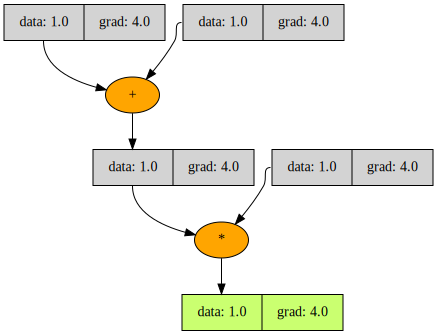

In [7]:
s = Digraph(filename='grafo',
            format="png",
            graph_attr={'rankdir': "TB"},
            node_attr={'style': "filled"})

s.node('val1', '<d> data: 1.0 |<g> grad: 4.0', shape='record')
s.node('val2', '<d> data: 1.0 |<g> grad: 4.0', shape='record')
s.node('val3', '<d> data: 1.0 |<g> grad: 4.0', shape='record')
s.node('val4', '<d> data: 1.0 |<g> grad: 4.0', shape='record')
s.node('val5', '<d> data: 1.0 |<g> grad: 4.0', shape='record', fillcolor='darkolivegreen1')
s.node('op1', "+", fillcolor='orange')
s.node('op2', "*", fillcolor='orange')

s.edges([('val1:d', 'op1'),
         ('val2:d', 'op1'),
         ('op1', 'val4:d'),
         ('val3:d', 'op2'),
         ('val4:d', 'op2'),
         ('op2', 'val5:d')])

s

In [8]:
s.render()

'grafo.png'

# Pytorch

In [10]:
a = torch.tensor(5.0, requires_grad=True)
b = torch.tensor(3.0, requires_grad=True)
c = torch.tensor(2.0, requires_grad=True)
y = 3*(a + (b * c))
y
y.backward()